# Permutation Feature Importance

[Machine Learning Interpretability course](https://www.trainindata.com/p/machine-learning-interpretability)

In this notebook, we will evaluate feature importance by permutation, using Scikit-learn, Eli5 and Feature-engine.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [2]:
variables = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
             'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
             'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',  '1stFlrSF',
             '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
             'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
             'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
             'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
             '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
             'MoSold', 'YrSold', 'SalePrice']

In [3]:
# load dataset

data = pd.read_csv('../houseprice.csv', usecols=variables)

data.shape

(1460, 34)

In [4]:
# separate train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 33), (438, 33))

## Random Forests

In [5]:
# Train Random Forests

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=3,
    random_state=2909,)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=2909)

In [6]:
# R2 in train set

rf.score(X_train, y_train)

0.8078308037529935

In [7]:
# R2 in test set

rf.score(X_test, y_test)

0.780510833461595

## Tree derived feature importance

<Axes: >

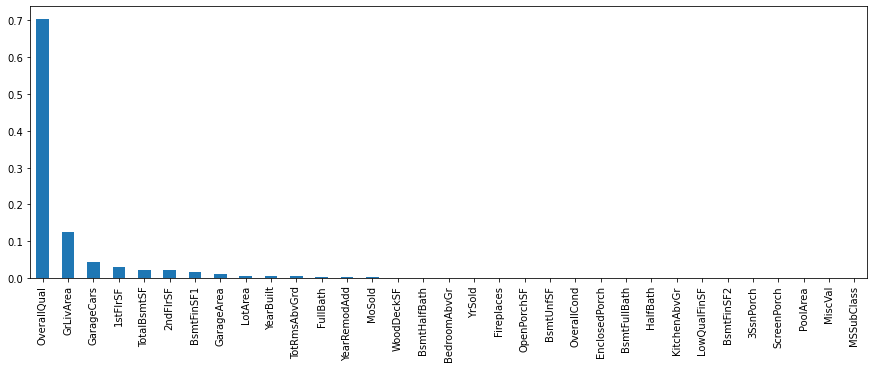

In [8]:
pd.Series(
    rf.feature_importances_,
    index=rf.feature_names_in_,
).sort_values(
    ascending=False).plot.bar(figsize=(15, 5))

# Permutation Feature Importance

## Sklearn

In [9]:
r = permutation_importance(
    rf, 
    X_test, # we use the test set
    y_test,
    scoring= "r2", # we can use any metric
    n_repeats=5, 
    random_state=0,
)

In [10]:
# contains is an array of arrays
# contains the individual importance of each repetition#
# and the mean and std

importance = pd.DataFrame(
    {"importance_mean": r["importances_mean"],
     "importance_std": r["importances_std"]},
    index=rf.feature_names_in_)

importance.head()

,importance_mean,importance_std
MSSubClass,0.000000,0.000000
LotArea,0.001962,0.000866
OverallQual,0.734667,0.046747
OverallCond,-0.000596,0.000404
YearBuilt,0.003536,0.000484


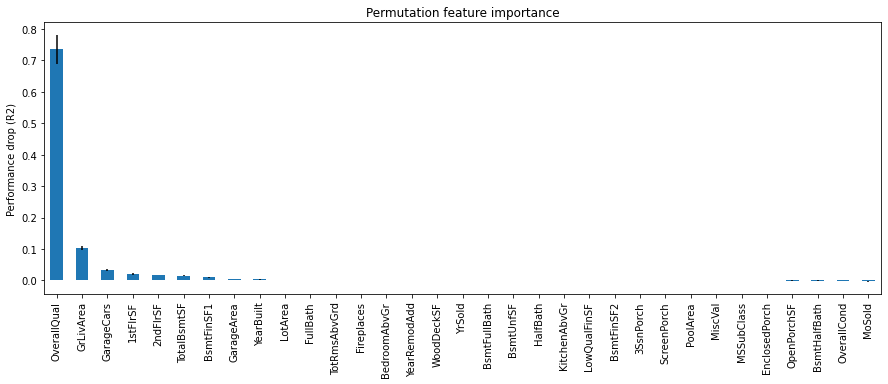

In [11]:
# The larger the drop, the more important the feature

importance["importance_mean"].sort_values(
    ascending=False
).plot(figsize=(15, 5), kind="bar", yerr=importance["importance_std"])

plt.title("Permutation feature importance")
plt.ylabel("Performance drop (R2)")
plt.show()

## Eli5

In [12]:
import eli5
from eli5.sklearn import PermutationImportance

from sklearn.feature_selection import SelectFromModel

In [13]:
# set up the permutation class

# we already fit the estimator
perm = PermutationImportance(
    rf,
    scoring="r2",
    n_iter=3,  # number of times each feature is shuffled
    cv="prefit",
    random_state=5,
)

# Note that we use the test set to calculate
# the feature importance
perm.fit(X_test, y_test)

perm

PermutationImportance(estimator=RandomForestRegressor(max_depth=3,
                                                      random_state=2909),
                      n_iter=3, random_state=5, scoring='r2')

In [14]:
# the feature importance values

perm.feature_importances_

array([ 0.00000000e+00,  1.91071694e-03,  7.47562735e-01, -5.23009380e-04,
        4.43478058e-03, -3.63556723e-05,  9.31780093e-03,  0.00000000e+00,
        3.47562536e-05,  1.67963148e-02,  2.02569869e-02,  1.75348963e-02,
        0.00000000e+00,  1.19605598e-01,  5.08981273e-05,  1.23995339e-04,
        1.18268604e-03,  0.00000000e+00,  5.43167325e-04,  0.00000000e+00,
        1.36194973e-03,  9.38165154e-04,  3.16932827e-02,  4.27328333e-03,
        1.72238438e-05, -1.19245624e-04,  6.56901974e-05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.18851747e-03,
       -1.93107867e-04])

In [15]:
# the standard deviation of the importance

perm.feature_importances_std_

array([0.00000000e+00, 6.44390929e-04, 3.97089188e-02, 8.57139286e-04,
       4.81557702e-04, 7.88513197e-04, 1.34917631e-03, 0.00000000e+00,
       8.39790138e-05, 5.21492710e-04, 1.30447545e-03, 6.78008114e-04,
       0.00000000e+00, 8.93588741e-03, 1.72215130e-05, 9.11536421e-05,
       2.24819406e-04, 0.00000000e+00, 6.95388127e-04, 0.00000000e+00,
       2.68425069e-04, 4.70317972e-05, 7.54101681e-03, 1.04477378e-03,
       1.33363889e-04, 7.87461278e-05, 3.04898686e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.42232351e-03,
       4.42201233e-04])

In [16]:
importance = pd.DataFrame({
    "importance": perm.feature_importances_,
    "std": perm.feature_importances_std_,
    },
    index = X_test.columns.to_list()
)

importance.head()

,importance,std
MSSubClass,0.000000,0.000000
LotArea,0.001911,0.000644
OverallQual,0.747563,0.039709
OverallCond,-0.000523,0.000857
YearBuilt,0.004435,0.000482


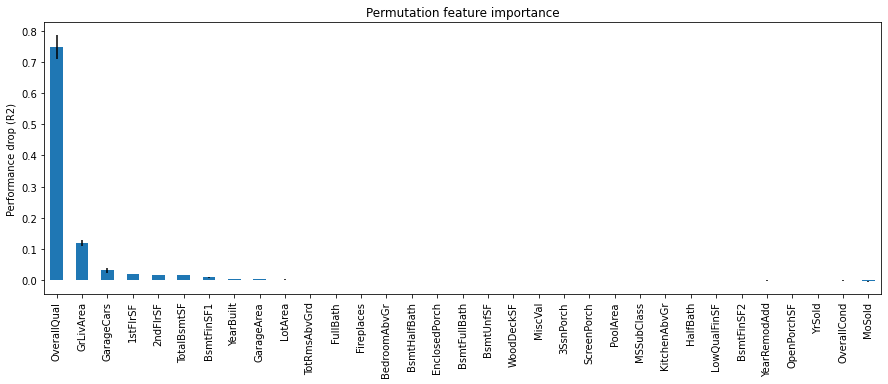

In [17]:
# plot manually

importance["importance"].sort_values(
    ascending=False
).plot(figsize=(15, 5), kind="bar", yerr=importance["std"])

plt.title("Permutation feature importance")
plt.ylabel("Performance drop (R2)")
plt.show()

In [18]:
# with eli5

eli5.show_weights(perm)

Weight,Feature
0.7476 ± 0.0794,x2
0.1196 ± 0.0179,x13
0.0317 ± 0.0151,x22
0.0203 ± 0.0026,x10
0.0175 ± 0.0014,x11
0.0168 ± 0.0010,x9
0.0093 ± 0.0027,x6
0.0044 ± 0.0010,x4
0.0043 ± 0.0021,x23
0.0019 ± 0.0013,x1


### Feature Selection

In [19]:
sel = SelectFromModel(
    perm,
    threshold=0.01, # select features above this value
    prefit=True,
).set_output(transform="pandas")

# remove features
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t.shape

C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(1022, 6)

In [20]:
# Resulting dataframe

X_train_t.head()

,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageCars
64,7,1057,1057,977,2034,2
682,6,1291,1291,0,1291,2
960,5,858,858,0,858,0
1384,6,560,698,560,1258,1
1100,2,290,438,0,438,1


## Feature-engine

In [21]:
from feature_engine.selection import SelectByShuffling

In [22]:
sel = SelectByShuffling(
    variables=None, # automatically examine all numerical variables
    estimator=rf, # the ML model
    scoring='r2', # the metric to evaluate
    threshold=0.01,# the maximum performance drop allowed to select the feature
    cv=3, # cross-validation
    random_state=1 # seed
)

# Feature-engine measures importance with
# cross-validation over the train set
# the importance is derived from the 
# held out fold

sel.fit(X_train, y_train)

SelectByShuffling(estimator=RandomForestRegressor(max_depth=3,
                                                  random_state=2909),
                  random_state=1, scoring='r2', threshold=0.01)

In [23]:
# full model performance

sel.initial_model_performance_

0.7606492527531618

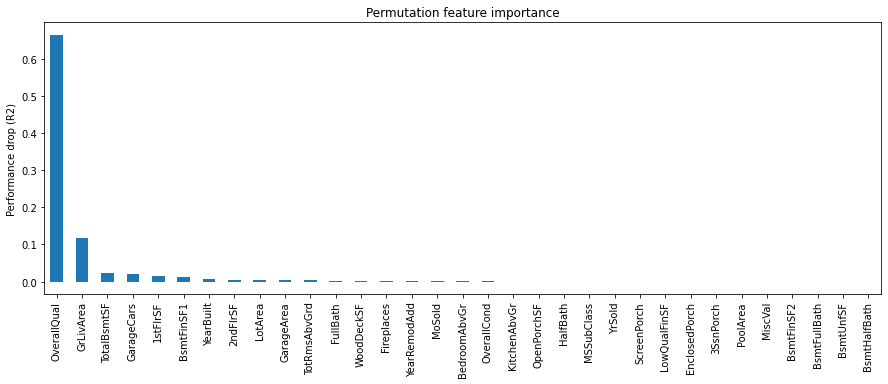

In [24]:
pd.Series(sel.performance_drifts_).sort_values(
    ascending=False).plot.bar(figsize=(15, 5))

plt.title("Permutation feature importance")
plt.ylabel("Performance drop (R2)")
plt.show()

In [25]:
# Drop features

X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t.shape

(1022, 6)

In [26]:
X_train_t.head()

,OverallQual,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars
64,7,739,1057,1057,2034,2
682,6,1003,1291,1291,1291,2
960,5,696,858,858,858,0
1384,6,204,560,698,1258,1
1100,2,290,290,438,438,1
